# Predicting work placement status using GPA scores
* DSCI 100 Project Proposal
* **Group 005-32**: Imanjosh Chahal, Kahsennaró-roks Deom, Romina Mahinpei

## Introduction
**Research question** : Can we use GPA scores (secondary school, high school, degree, MBA, and employability test GPAs) to predict whether a student will secure a work placement poisition or not?


## Preliminary Exploratory Data Analysis
We begin the exploration by loading packages and reading the dataset from the web.

In [10]:
# load packages
library(tidyverse)
library(tidymodels)
library(repr)

Warning message:
“package ‘tidymodels’ was built under R version 4.0.2”
── Attaching packages ────────────────────────────────────── tidymodels 0.1.1 ──

✔ broom     0.7.0      ✔ recipes   0.1.13
✔ dials     0.0.9      ✔ rsample   0.0.7 
✔ infer     0.5.4      ✔ tune      0.1.1 
✔ modeldata 0.0.2      ✔ workflows 0.2.0 
✔ parsnip   0.1.3      ✔ yardstick 0.0.7 

Warning message:
“package ‘broom’ was built under R version 4.0.2”
Warning message:
“package ‘dials’ was built under R version 4.0.2”
Warning message:
“package ‘infer’ was built under R version 4.0.3”
Warning message:
“package ‘modeldata’ was built under R version 4.0.1”
Warning message:
“package ‘parsnip’ was built under R version 4.0.2”
Warning message:
“package ‘recipes’ was built under R version 4.0.1”
Warning message:
“package ‘tune’ was built under R version 4.0.2”
Warning message:
“package ‘workflows’ was built under R version 4.0.2”
Warning message:
“package ‘yardstick’ was built under R version 4.0.2”
── Conflicts ────

In [14]:
# load data
data_url <- "https://raw.githubusercontent.com/DG1606/CMS-R-2020/7f00d6b5e20d99a933c582d8b544fc4d04528462/Placement_Data_Full_Class.csv"
data_original <- read_csv(data_url)
head(data_original)

Parsed with column specification:
cols(
  sl_no = col_double(),
  gender = col_character(),
  ssc_p = col_double(),
  ssc_b = col_character(),
  hsc_p = col_double(),
  hsc_b = col_character(),
  hsc_s = col_character(),
  degree_p = col_double(),
  degree_t = col_character(),
  workex = col_character(),
  etest_p = col_double(),
  specialisation = col_character(),
  mba_p = col_double(),
  status = col_character(),
  salary = col_double()
)



sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
<dbl>,<chr>,<dbl>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<chr>,<dbl>
1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000
2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000
3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000
4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NA
5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000
6,M,55.00,Others,49.80,Others,Science,67.25,Sci&Tech,Yes,55.0,Mkt&Fin,51.58,Not Placed,NA


We note that the data is already in tidy format since it meets the following requirements:
* Each variable forms a column.
* Each observation forms a row.
* Each cells represents a single measurement.

However, since we will treat the "status" variable as our label later in the analysis, we change the column type to a factor. Then, we split the data into a testing set (25% of original data) and a training set (75% of original data).

In [25]:
# treat status as a factor
data_original <- mutate(data_original, status = as_factor(status))

# split data into testing and training sets
data_split <- initial_split(data_original, prop = 0.75, strata = status)
data_train <- training(data_split)
data_test <- testing(data_split)

We summarize the training data in the table below and display the means of our  predictor variables for each of the two levels of our  label.

In [28]:
# summarize training data
data_predictors <- data_train %>%
    select(status, ssc_p, hsc_p, degree_p, mba_p, etest_p) %>%
    group_by(status) %>%
    summarize(ssc_p = mean(ssc_p), hsc_p = mean(hsc_p), degree_p = mean(degree_p), mba_p = mean(mba_p), etest_p = mean(etest_p))
data_predictors

`summarise()` ungrouping output (override with `.groups` argument)



status,ssc_p,hsc_p,degree_p,mba_p,etest_p
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Placed,72.35658,70.17306,69.09577,62.48982,72.29622
Not Placed,57.36627,59.30020,60.72627,62.05353,69.85902


We observe that Placed students appear to have higher average GPA scores than Not Placed students. This suggests that students can indeed be classified into two binary groups (Placed vs. Not Placed) based on their GPA scores, thus making this scenario an ideal candidate for classification. 

We further highlight that our dataset is an ideal candidate for classification by creating a scatterplot of degree percentages vs. high school percentages. 

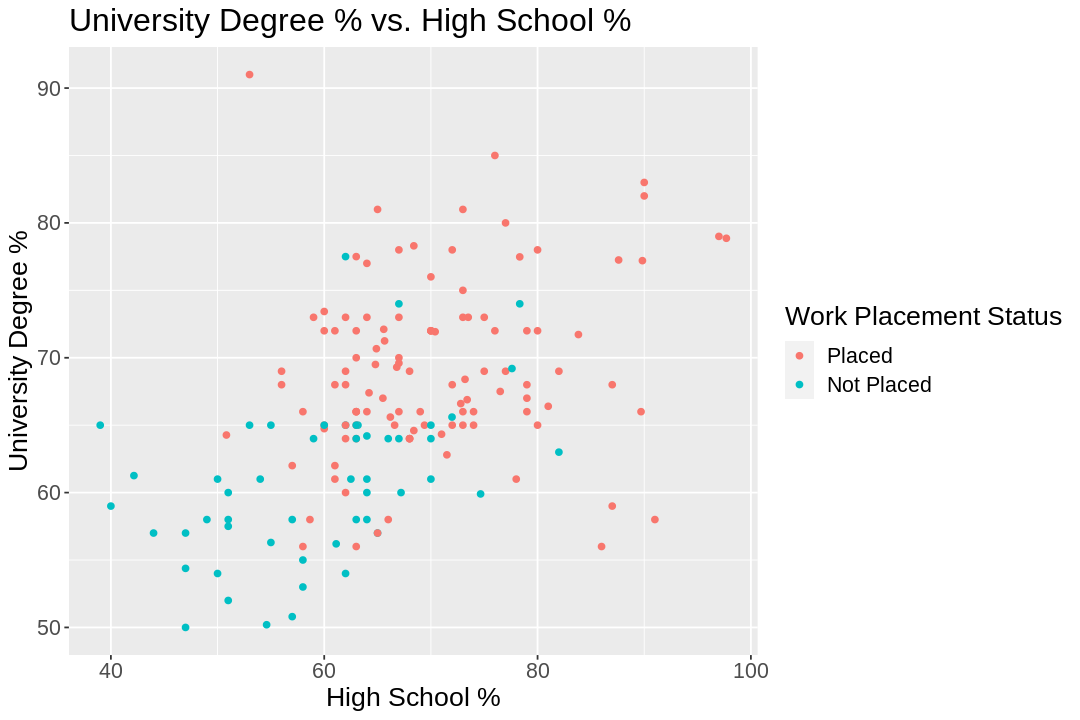

In [43]:
# visualize data by creating a scatterplot
options(repr.plot.width = 9, repr.plot.height = 6) 
summary_plot <- ggplot(data_train, aes(x = hsc_p, y = degree_p, color = status)) +
    geom_point() + 
    xlab("High School %") +
    ylab("University Degree %") +
    labs(color = "Work Placement Status") +
    theme(text = element_text(size = 16)) + 
    ggtitle("University Degree % vs. High School %")
summary_plot

## Methods
* Explain how you will conduct either your data analysis and which variables/columns you will use. Note - you do not need to use all variables/columns that exist in the raw data set. In fact, that's often not a good idea. For each variable think: is this a useful variable for prediction?
* Describe at least one way that you will visualize the results

## Expected Outcomes & Significance
* What do you expect to find?
* What impact could such findings have?
* What future questions could this lead to?